<a href="https://colab.research.google.com/github/19PA1A0294/AILab/blob/master/K_means_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K MEANS CLUSTERING

## 1) Import the packages

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## 2) Import the data

In [6]:
data=pd.read_csv("hclustdata.csv")
data.head() # Check the first 5 rows of the data.

,Na0e,Gender,SSC Perc\nentage,inter/Diplo0a perc,B.Tech perc,Back\nlogs
0,ARIGELA AVINASH,0,87.3,65.3,40.00,18
1,BALADARI KEERTHANA,1,89.0,92.4,71.45,0
2,BAVIRISETTI PRAVALIKA,1,67.0,68.0,45.26,13
3,BODDU SAI BABA,0,71.0,70.4,36.47,17
4,BONDAPALLISRINIVAS,0,67.0,65.5,42.52,17


In [7]:
data.describe()

,Gender,SSC Perc\nentage,inter/Diplo0a perc,B.Tech perc,Back\nlogs
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.418803,80.238889,80.781453,62.943111,4.111111
std,0.495485,8.882000,11.271626,12.064580,6.335148
min,0.000000,47.800000,52.200000,31.200000,0.000000
25%,0.000000,75.500000,73.400000,54.181818,0.000000
50%,0.000000,82.300000,83.600000,64.360000,0.000000
75%,1.000000,87.000000,90.000000,72.570000,7.000000
max,1.000000,93.660000,96.900000,88.100000,25.000000


## 3) Pre-processing the data
Here we want to cluster students based on their Inter_diploma percentage and B.Tech percentage.

In [8]:
data1 = data.iloc[:, [3,4]].values # 3 means inter_diploma percentage and 4 means B.Tech percentage
data1

array([[65.3       , 40.        ],
       [92.4       , 71.45      ],
       [68.        , 45.26      ],
       [70.4       , 36.47      ],
       [65.5       , 42.52      ],
       [68.        , 62.2       ],
       [56.5       , 33.77      ],
       [79.3       , 61.02      ],
       [89.6       , 53.        ],
       [75.5       , 51.        ],
       [76.3       , 71.49      ],
       [66.        , 49.67272727],
       [60.3       , 54.74      ],
       [88.7       , 74.96      ],
       [52.2       , 50.55      ],
       [87.        , 75.96      ],
       [85.        , 70.01      ],
       [95.1       , 85.39      ],
       [86.3       , 71.65      ],
       [93.6       , 74.34      ],
       [90.3       , 76.9       ],
       [83.9       , 73.01      ],
       [83.        , 68.3       ],
       [90.4       , 70.3       ],
       [87.2       , 54.18181818],
       [78.3       , 55.82      ],
       [81.        , 61.        ],
       [65.3       , 38.        ],
       [67.1       ,

In [9]:
type(data1) # Note that the output is in the form of numpy array.

numpy.ndarray

Text(0, 0.5, 'B.Tech Percentage')

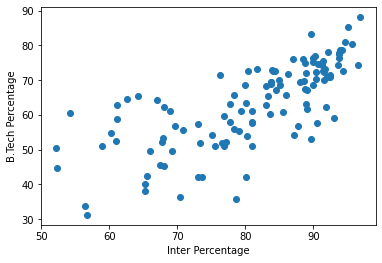

In [10]:
# Now our data is in "data 1", Where [:0] represents Inter_diploma percentage and [:,1] represents B.Tech percentage
# Just plot the data for preliminary analysis.
plt.scatter(data1[:,0],data1[:,1])
plt.xlabel("Inter Percentage")
plt.ylabel("B.Tech Percentage")

## 4) Now use the Kmeans algorithm from sklearn .

In [11]:
clust=KMeans(n_clusters=2) # Lets create the "clust" object. Here the number of clusters desired as 2. 

In [12]:
model=clust.fit_predict(data1) # Now apply the "clust object on training data and build a model. Let's name it as "model"
model

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0], dtype=int32)

### The data numbers above indicate the cluster. Since, we have 2 clusters, all "0" belong to a cluster. And, all "1" belongs to another cluster

In [13]:
clust.cluster_centers_ # returns the cluster centroids.

array([[88.23352113, 70.41633803],
       [69.27934783, 51.40834781]])

## 5) Now let's visualize the data again. 
This time, based on the output of the model, all "0"s are marked in a colour. And, all "1"s are marked in another colour. This is done using "cmap="rainbow" and "c=model"

We got the cluster centroids using "clust.cluster_centers_". It will be good if we plot them too. They are indicated with thick black points using scatter function.

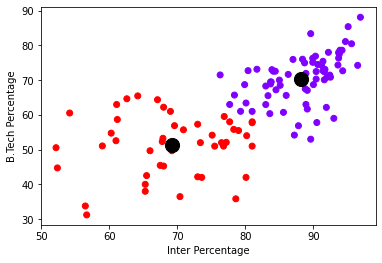

In [14]:
plt.scatter(data1[:,0],data1[:,1],c=model,cmap='rainbow')
plt.xlabel("Inter Percentage")
plt.ylabel("B.Tech Percentage")

centers = clust.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)

In [15]:
data["clusters"]=pd.Series(model)
data.head()

,Na0e,Gender,SSC Perc\nentage,inter/Diplo0a perc,B.Tech perc,Back\nlogs,clusters
0,ARIGELA AVINASH,0,87.3,65.3,40.00,18,1
1,BALADARI KEERTHANA,1,89.0,92.4,71.45,0,0
2,BAVIRISETTI PRAVALIKA,1,67.0,68.0,45.26,13,1
3,BODDU SAI BABA,0,71.0,70.4,36.47,17,1
4,BONDAPALLISRINIVAS,0,67.0,65.5,42.52,17,1


We are done with k-means. But if you cannot decide on k value, then you can use _kmeanModel.inertia_ to find ideal value of k.

## 6) How to find correct value of K?

###  _Inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster._
The formula is given below.

![Capture.JPG](attachment:Capture.JPG)

In [17]:
# For each value of k, check the inertia. 
# I am checking k value from 1 to 10. I dont want more than 10 clusters. So, i am running loop from 1 to 10.

# For every value of k, i am building the model and checking the performance on the data using inertia.
distortions = [] 
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data1) 
    distortions.append(kmeanModel.inertia_) # The output of "kmeanModel.inertia_" is kept in a list named "distortions".

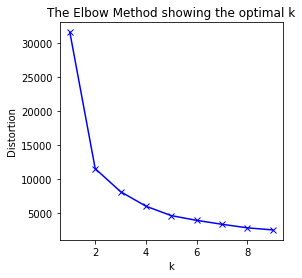

In [18]:
# Now plot a graph between value of k and distortions. 


plt.figure(figsize=(4,4))
plt.plot(K, distortions, 'bx-') # "bx-" is used to mark the points"
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Elbow method:
To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 2.

In [20]:
# we made a right guess. we get the correct result with value of k=2